# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [176]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [177]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

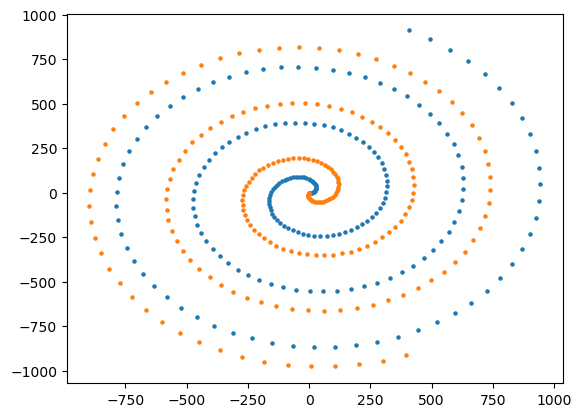

In [178]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [179]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [180]:
# your code here

In [181]:
df.head()

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0


In [182]:
df["XX"]=df["X"]*df["X"]
df["YY"]=df["Y"]*df["Y"]
df["sinX"]=np.sin(df["X"])
df["sinY"]=np.sin(df["Y"])

In [183]:
df.head()

,X,Y,CLASS,XX,YY,sinX,sinY
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
1,4.975021,0.499167,0,24.750832,0.249168,-0.965710,0.478694
2,9.800666,1.986693,0,96.053050,3.946950,-0.367099,0.914754
3,14.330047,4.432803,0,205.350257,19.649743,0.981456,-0.961170
4,18.421220,7.788367,0,339.341342,60.658658,-0.415358,0.997848


In [184]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

import warnings
warnings.filterwarnings("ignore")

In [185]:
# Normalize the input data.

#Power Transformer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

df_n = PowerTransformer().fit_transform(df)
df_n = pd.DataFrame(df_n, columns = df.columns)
    
#MinMaxScaler
df_n = MinMaxScaler().fit_transform(df_n)
df = pd.DataFrame(df_n, columns=df.columns) #convert np.array to pd.DataFrame

In [186]:
df

,X,Y,CLASS,XX,YY,sinX,sinY
0,0.486225,0.485661,0.0,0.000000,0.000000,0.498070,0.519572
1,0.488929,0.485926,0.0,0.060029,0.003180,0.016992,0.753713
2,0.491552,0.486721,0.0,0.098741,0.026283,0.314813,0.960235
3,0.494014,0.488036,0.0,0.125967,0.057921,0.990678,0.020784
4,0.496239,0.489851,0.0,0.146512,0.088941,0.290761,0.999014
...,...,...,...,...,...,...,...
396,0.490923,0.000000,1.0,0.090675,1.000000,0.850758,0.066118
397,0.544142,0.000376,1.0,0.368890,0.999669,0.333637,0.367675
398,0.597344,0.005605,1.0,0.502104,0.995056,0.479389,0.123341
399,0.649977,0.015683,1.0,0.600152,0.986078,0.194760,0.199323


In [187]:
# your code here
y= df["CLASS"]
x=df.drop(columns="CLASS")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=7)

print(X_train.shape)
print(X_test.shape)

(200, 6)
(201, 6)


In [188]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
   
)

model_cb = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model_cb.add(Dense(units = 400,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model_cb.add(Dense(units = 200,activation='relu'))
model_cb.add(Dense(units = 100,activation='relu'))
model_cb.add(Dense(units =50,activation='relu'))
model_cb.add(Dense(units = 25,activation='relu'))
# Adding the final layer
model_cb.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_cb.compile(optimizer="adam", # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy' # Error metrics to report
              )


model_cb.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 400)               2800      
                                                                 
 dense_66 (Dense)            (None, 200)               80200     
                                                                 
 dense_67 (Dense)            (None, 100)               20100     
                                                                 
 dense_68 (Dense)            (None, 50)                5050      
                                                                 
 dense_69 (Dense)            (None, 25)                1275      
                                                                 
 dense_70 (Dense)            (None, 2)                 52        
                                                                 
Total params: 109,477
Trainable params: 109,477
Non-t

In [189]:
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.
early_stopping = EarlyStopping(patience=5) 

checkpoint_path = 'cls-nnb.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [190]:
history_cb = model_cb.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.20, 
    batch_size=20, 
    verbose=2,
    
    
)

Epoch 1/1000
8/8 - 1s - loss: 0.7012 - accuracy: 0.4625 - val_loss: 0.6913 - val_accuracy: 0.4250 - 968ms/epoch - 121ms/step
Epoch 2/1000
8/8 - 0s - loss: 0.6932 - accuracy: 0.5250 - val_loss: 0.6886 - val_accuracy: 0.7000 - 36ms/epoch - 4ms/step
Epoch 3/1000
8/8 - 0s - loss: 0.6914 - accuracy: 0.5063 - val_loss: 0.6868 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 4/1000
8/8 - 0s - loss: 0.6908 - accuracy: 0.5375 - val_loss: 0.6763 - val_accuracy: 0.6500 - 34ms/epoch - 4ms/step
Epoch 5/1000
8/8 - 0s - loss: 0.6862 - accuracy: 0.5625 - val_loss: 0.6715 - val_accuracy: 0.7000 - 34ms/epoch - 4ms/step
Epoch 6/1000
8/8 - 0s - loss: 0.6801 - accuracy: 0.6187 - val_loss: 0.6712 - val_accuracy: 0.6500 - 33ms/epoch - 4ms/step
Epoch 7/1000
8/8 - 0s - loss: 0.6750 - accuracy: 0.6062 - val_loss: 0.6698 - val_accuracy: 0.6250 - 34ms/epoch - 4ms/step
Epoch 8/1000
8/8 - 0s - loss: 0.6721 - accuracy: 0.6000 - val_loss: 0.6534 - val_accuracy: 0.6500 - 33ms/epoch - 4ms/step
Epoch 9/1000
8/8 - 0s

Epoch 68/1000
8/8 - 0s - loss: 0.1973 - accuracy: 0.9250 - val_loss: 2.2025 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 69/1000
8/8 - 0s - loss: 0.1478 - accuracy: 0.9312 - val_loss: 2.3152 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 70/1000
8/8 - 0s - loss: 0.1487 - accuracy: 0.9375 - val_loss: 2.6323 - val_accuracy: 0.4750 - 35ms/epoch - 4ms/step
Epoch 71/1000
8/8 - 0s - loss: 0.1907 - accuracy: 0.8875 - val_loss: 2.2246 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 72/1000
8/8 - 0s - loss: 0.1837 - accuracy: 0.9375 - val_loss: 2.2128 - val_accuracy: 0.5000 - 36ms/epoch - 4ms/step
Epoch 73/1000
8/8 - 0s - loss: 0.1635 - accuracy: 0.9250 - val_loss: 2.4069 - val_accuracy: 0.5250 - 34ms/epoch - 4ms/step
Epoch 74/1000
8/8 - 0s - loss: 0.1545 - accuracy: 0.9125 - val_loss: 2.3593 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 75/1000
8/8 - 0s - loss: 0.1259 - accuracy: 0.9563 - val_loss: 2.3460 - val_accuracy: 0.5250 - 34ms/epoch - 4ms/step
Epoch 76/1000
8/

Epoch 135/1000
8/8 - 0s - loss: 0.0180 - accuracy: 0.9937 - val_loss: 3.4925 - val_accuracy: 0.5250 - 49ms/epoch - 6ms/step
Epoch 136/1000
8/8 - 0s - loss: 0.0138 - accuracy: 1.0000 - val_loss: 3.5040 - val_accuracy: 0.5250 - 39ms/epoch - 5ms/step
Epoch 137/1000
8/8 - 0s - loss: 0.0147 - accuracy: 1.0000 - val_loss: 3.5114 - val_accuracy: 0.5250 - 42ms/epoch - 5ms/step
Epoch 138/1000
8/8 - 0s - loss: 0.0193 - accuracy: 0.9937 - val_loss: 3.6243 - val_accuracy: 0.5000 - 38ms/epoch - 5ms/step
Epoch 139/1000
8/8 - 0s - loss: 0.0209 - accuracy: 0.9875 - val_loss: 3.4381 - val_accuracy: 0.5500 - 44ms/epoch - 5ms/step
Epoch 140/1000
8/8 - 0s - loss: 0.0367 - accuracy: 0.9750 - val_loss: 4.0265 - val_accuracy: 0.4750 - 45ms/epoch - 6ms/step
Epoch 141/1000
8/8 - 0s - loss: 0.0492 - accuracy: 0.9875 - val_loss: 3.2761 - val_accuracy: 0.6250 - 43ms/epoch - 5ms/step
Epoch 142/1000
8/8 - 0s - loss: 0.0794 - accuracy: 0.9688 - val_loss: 4.0034 - val_accuracy: 0.4500 - 39ms/epoch - 5ms/step
Epoch 14

8/8 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.0896 - val_accuracy: 0.5250 - 34ms/epoch - 4ms/step
Epoch 202/1000
8/8 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.1300 - val_accuracy: 0.5250 - 34ms/epoch - 4ms/step
Epoch 203/1000
8/8 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.1352 - val_accuracy: 0.5500 - 35ms/epoch - 4ms/step
Epoch 204/1000
8/8 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.1855 - val_accuracy: 0.5250 - 34ms/epoch - 4ms/step
Epoch 205/1000
8/8 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.1836 - val_accuracy: 0.5250 - 36ms/epoch - 4ms/step
Epoch 206/1000
8/8 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.1765 - val_accuracy: 0.5250 - 71ms/epoch - 9ms/step
Epoch 207/1000
8/8 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.2080 - val_accuracy: 0.5250 - 46ms/epoch - 6ms/step
Epoch 208/1000
8/8 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.2039 - val_accuracy: 0.5250 - 37ms/epoch - 5ms/step
Epoch 209/1000
8/8 - 0s

Epoch 266/1000
8/8 - 0s - loss: 4.0893e-04 - accuracy: 1.0000 - val_loss: 4.9003 - val_accuracy: 0.5250 - 32ms/epoch - 4ms/step
Epoch 267/1000
8/8 - 0s - loss: 4.0920e-04 - accuracy: 1.0000 - val_loss: 4.9226 - val_accuracy: 0.5250 - 31ms/epoch - 4ms/step
Epoch 268/1000
8/8 - 0s - loss: 3.8855e-04 - accuracy: 1.0000 - val_loss: 4.9083 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 269/1000
8/8 - 0s - loss: 3.8693e-04 - accuracy: 1.0000 - val_loss: 4.9041 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 270/1000
8/8 - 0s - loss: 3.9225e-04 - accuracy: 1.0000 - val_loss: 4.9191 - val_accuracy: 0.5250 - 33ms/epoch - 4ms/step
Epoch 271/1000
8/8 - 0s - loss: 3.7182e-04 - accuracy: 1.0000 - val_loss: 4.9312 - val_accuracy: 0.5250 - 33ms/epoch - 4ms/step
Epoch 272/1000
8/8 - 0s - loss: 3.7017e-04 - accuracy: 1.0000 - val_loss: 4.9578 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 273/1000
8/8 - 0s - loss: 3.5952e-04 - accuracy: 1.0000 - val_loss: 4.9579 - val_accuracy: 0.5500 

8/8 - 0s - loss: 1.5892e-04 - accuracy: 1.0000 - val_loss: 5.3513 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 331/1000
8/8 - 0s - loss: 1.5733e-04 - accuracy: 1.0000 - val_loss: 5.3501 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 332/1000
8/8 - 0s - loss: 1.6093e-04 - accuracy: 1.0000 - val_loss: 5.3503 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 333/1000
8/8 - 0s - loss: 1.5195e-04 - accuracy: 1.0000 - val_loss: 5.3506 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 334/1000
8/8 - 0s - loss: 1.6017e-04 - accuracy: 1.0000 - val_loss: 5.3508 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 335/1000
8/8 - 0s - loss: 1.4996e-04 - accuracy: 1.0000 - val_loss: 5.3770 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 336/1000
8/8 - 0s - loss: 1.4432e-04 - accuracy: 1.0000 - val_loss: 5.3890 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 337/1000
8/8 - 0s - loss: 1.4666e-04 - accuracy: 1.0000 - val_loss: 5.3879 - val_accuracy: 0.5500 - 35ms/epoch - 

Epoch 395/1000
8/8 - 0s - loss: 7.5285e-05 - accuracy: 1.0000 - val_loss: 5.7334 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 396/1000
8/8 - 0s - loss: 7.4645e-05 - accuracy: 1.0000 - val_loss: 5.7314 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 397/1000
8/8 - 0s - loss: 7.3468e-05 - accuracy: 1.0000 - val_loss: 5.7206 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 398/1000
8/8 - 0s - loss: 7.1285e-05 - accuracy: 1.0000 - val_loss: 5.7155 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 399/1000
8/8 - 0s - loss: 7.0722e-05 - accuracy: 1.0000 - val_loss: 5.7255 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 400/1000
8/8 - 0s - loss: 7.1630e-05 - accuracy: 1.0000 - val_loss: 5.7323 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 401/1000
8/8 - 0s - loss: 6.8843e-05 - accuracy: 1.0000 - val_loss: 5.7429 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 402/1000
8/8 - 0s - loss: 6.8887e-05 - accuracy: 1.0000 - val_loss: 5.7416 - val_accuracy: 0.5500 

8/8 - 0s - loss: 3.9928e-05 - accuracy: 1.0000 - val_loss: 5.9989 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 460/1000
8/8 - 0s - loss: 4.1017e-05 - accuracy: 1.0000 - val_loss: 6.0091 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 461/1000
8/8 - 0s - loss: 4.0686e-05 - accuracy: 1.0000 - val_loss: 6.0019 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 462/1000
8/8 - 0s - loss: 4.0373e-05 - accuracy: 1.0000 - val_loss: 6.0099 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 463/1000
8/8 - 0s - loss: 3.8824e-05 - accuracy: 1.0000 - val_loss: 6.0118 - val_accuracy: 0.5500 - 32ms/epoch - 4ms/step
Epoch 464/1000
8/8 - 0s - loss: 3.8770e-05 - accuracy: 1.0000 - val_loss: 6.0104 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 465/1000
8/8 - 0s - loss: 3.8052e-05 - accuracy: 1.0000 - val_loss: 6.0089 - val_accuracy: 0.5500 - 33ms/epoch - 4ms/step
Epoch 466/1000
8/8 - 0s - loss: 3.7515e-05 - accuracy: 1.0000 - val_loss: 6.0182 - val_accuracy: 0.5500 - 33ms/epoch - 

Epoch 524/1000
8/8 - 0s - loss: 2.4433e-05 - accuracy: 1.0000 - val_loss: 6.2511 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 525/1000
8/8 - 0s - loss: 2.4060e-05 - accuracy: 1.0000 - val_loss: 6.2475 - val_accuracy: 0.5500 - 35ms/epoch - 4ms/step
Epoch 526/1000
8/8 - 0s - loss: 2.4180e-05 - accuracy: 1.0000 - val_loss: 6.2525 - val_accuracy: 0.5500 - 35ms/epoch - 4ms/step
Epoch 527/1000
8/8 - 0s - loss: 2.3305e-05 - accuracy: 1.0000 - val_loss: 6.2615 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 528/1000
8/8 - 0s - loss: 2.3450e-05 - accuracy: 1.0000 - val_loss: 6.2677 - val_accuracy: 0.5500 - 35ms/epoch - 4ms/step
Epoch 529/1000
8/8 - 0s - loss: 2.3153e-05 - accuracy: 1.0000 - val_loss: 6.2679 - val_accuracy: 0.5500 - 36ms/epoch - 4ms/step
Epoch 530/1000
8/8 - 0s - loss: 2.2925e-05 - accuracy: 1.0000 - val_loss: 6.2684 - val_accuracy: 0.5500 - 34ms/epoch - 4ms/step
Epoch 531/1000
8/8 - 0s - loss: 2.2696e-05 - accuracy: 1.0000 - val_loss: 6.2641 - val_accuracy: 0.5750 

8/8 - 0s - loss: 1.5295e-05 - accuracy: 1.0000 - val_loss: 6.4798 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 589/1000
8/8 - 0s - loss: 1.5163e-05 - accuracy: 1.0000 - val_loss: 6.4851 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 590/1000
8/8 - 0s - loss: 1.5077e-05 - accuracy: 1.0000 - val_loss: 6.4864 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 591/1000
8/8 - 0s - loss: 1.4841e-05 - accuracy: 1.0000 - val_loss: 6.4938 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 592/1000
8/8 - 0s - loss: 1.4840e-05 - accuracy: 1.0000 - val_loss: 6.4952 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 593/1000
8/8 - 0s - loss: 1.4816e-05 - accuracy: 1.0000 - val_loss: 6.5016 - val_accuracy: 0.5750 - 35ms/epoch - 4ms/step
Epoch 594/1000
8/8 - 0s - loss: 1.4787e-05 - accuracy: 1.0000 - val_loss: 6.4907 - val_accuracy: 0.5750 - 36ms/epoch - 5ms/step
Epoch 595/1000
8/8 - 0s - loss: 1.4522e-05 - accuracy: 1.0000 - val_loss: 6.4851 - val_accuracy: 0.5750 - 32ms/epoch - 

8/8 - 0s - loss: 1.0081e-05 - accuracy: 1.0000 - val_loss: 6.6827 - val_accuracy: 0.5750 - 35ms/epoch - 4ms/step
Epoch 653/1000
8/8 - 0s - loss: 9.9683e-06 - accuracy: 1.0000 - val_loss: 6.6699 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 654/1000
8/8 - 0s - loss: 9.9877e-06 - accuracy: 1.0000 - val_loss: 6.6738 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 655/1000
8/8 - 0s - loss: 1.0048e-05 - accuracy: 1.0000 - val_loss: 6.6828 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 656/1000
8/8 - 0s - loss: 9.9229e-06 - accuracy: 1.0000 - val_loss: 6.6997 - val_accuracy: 0.5750 - 37ms/epoch - 5ms/step
Epoch 657/1000
8/8 - 0s - loss: 9.7091e-06 - accuracy: 1.0000 - val_loss: 6.7094 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 658/1000
8/8 - 0s - loss: 9.6614e-06 - accuracy: 1.0000 - val_loss: 6.7215 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 659/1000
8/8 - 0s - loss: 9.5809e-06 - accuracy: 1.0000 - val_loss: 6.7279 - val_accuracy: 0.5750 - 34ms/epoch - 

Epoch 717/1000
8/8 - 0s - loss: 6.7596e-06 - accuracy: 1.0000 - val_loss: 6.9153 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 718/1000
8/8 - 0s - loss: 6.6017e-06 - accuracy: 1.0000 - val_loss: 6.9196 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 719/1000
8/8 - 0s - loss: 6.5563e-06 - accuracy: 1.0000 - val_loss: 6.9077 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 720/1000
8/8 - 0s - loss: 6.5831e-06 - accuracy: 1.0000 - val_loss: 6.9078 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 721/1000
8/8 - 0s - loss: 6.5131e-06 - accuracy: 1.0000 - val_loss: 6.9142 - val_accuracy: 0.5750 - 31ms/epoch - 4ms/step
Epoch 722/1000
8/8 - 0s - loss: 6.4445e-06 - accuracy: 1.0000 - val_loss: 6.9264 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 723/1000
8/8 - 0s - loss: 6.4803e-06 - accuracy: 1.0000 - val_loss: 6.9379 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 724/1000
8/8 - 0s - loss: 6.3775e-06 - accuracy: 1.0000 - val_loss: 6.9453 - val_accuracy: 0.5750 

8/8 - 0s - loss: 3.3609e-06 - accuracy: 1.0000 - val_loss: 7.2610 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 782/1000
8/8 - 0s - loss: 3.2841e-06 - accuracy: 1.0000 - val_loss: 7.2602 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 783/1000
8/8 - 0s - loss: 3.2596e-06 - accuracy: 1.0000 - val_loss: 7.2579 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 784/1000
8/8 - 0s - loss: 3.2208e-06 - accuracy: 1.0000 - val_loss: 7.2592 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 785/1000
8/8 - 0s - loss: 3.2104e-06 - accuracy: 1.0000 - val_loss: 7.2635 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 786/1000
8/8 - 0s - loss: 3.2149e-06 - accuracy: 1.0000 - val_loss: 7.2724 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 787/1000
8/8 - 0s - loss: 3.2134e-06 - accuracy: 1.0000 - val_loss: 7.2791 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 788/1000
8/8 - 0s - loss: 3.1880e-06 - accuracy: 1.0000 - val_loss: 7.2810 - val_accuracy: 0.5750 - 36ms/epoch - 

Epoch 846/1000
8/8 - 0s - loss: 2.2061e-06 - accuracy: 1.0000 - val_loss: 7.4389 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 847/1000
8/8 - 0s - loss: 2.1889e-06 - accuracy: 1.0000 - val_loss: 7.4470 - val_accuracy: 0.5750 - 31ms/epoch - 4ms/step
Epoch 848/1000
8/8 - 0s - loss: 2.1934e-06 - accuracy: 1.0000 - val_loss: 7.4549 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 849/1000
8/8 - 0s - loss: 2.1569e-06 - accuracy: 1.0000 - val_loss: 7.4578 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 850/1000
8/8 - 0s - loss: 2.1435e-06 - accuracy: 1.0000 - val_loss: 7.4636 - val_accuracy: 0.5750 - 31ms/epoch - 4ms/step
Epoch 851/1000
8/8 - 0s - loss: 2.1338e-06 - accuracy: 1.0000 - val_loss: 7.4688 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 852/1000
8/8 - 0s - loss: 2.1316e-06 - accuracy: 1.0000 - val_loss: 7.4755 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 853/1000
8/8 - 0s - loss: 2.1010e-06 - accuracy: 1.0000 - val_loss: 7.4783 - val_accuracy: 0.5750 

8/8 - 0s - loss: 1.5251e-06 - accuracy: 1.0000 - val_loss: 7.6304 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 911/1000
8/8 - 0s - loss: 1.5125e-06 - accuracy: 1.0000 - val_loss: 7.6362 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 912/1000
8/8 - 0s - loss: 1.5125e-06 - accuracy: 1.0000 - val_loss: 7.6407 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 913/1000
8/8 - 0s - loss: 1.5020e-06 - accuracy: 1.0000 - val_loss: 7.6454 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 914/1000
8/8 - 0s - loss: 1.4990e-06 - accuracy: 1.0000 - val_loss: 7.6430 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 915/1000
8/8 - 0s - loss: 1.4938e-06 - accuracy: 1.0000 - val_loss: 7.6478 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 916/1000
8/8 - 0s - loss: 1.4871e-06 - accuracy: 1.0000 - val_loss: 7.6490 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 917/1000
8/8 - 0s - loss: 1.4663e-06 - accuracy: 1.0000 - val_loss: 7.6541 - val_accuracy: 0.5750 - 32ms/epoch - 

Epoch 975/1000
8/8 - 0s - loss: 1.0759e-06 - accuracy: 1.0000 - val_loss: 7.8055 - val_accuracy: 0.5750 - 35ms/epoch - 4ms/step
Epoch 976/1000
8/8 - 0s - loss: 1.0915e-06 - accuracy: 1.0000 - val_loss: 7.8147 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 977/1000
8/8 - 0s - loss: 1.0602e-06 - accuracy: 1.0000 - val_loss: 7.8175 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 978/1000
8/8 - 0s - loss: 1.0624e-06 - accuracy: 1.0000 - val_loss: 7.8203 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 979/1000
8/8 - 0s - loss: 1.0647e-06 - accuracy: 1.0000 - val_loss: 7.8224 - val_accuracy: 0.5750 - 32ms/epoch - 4ms/step
Epoch 980/1000
8/8 - 0s - loss: 1.0438e-06 - accuracy: 1.0000 - val_loss: 7.8256 - val_accuracy: 0.5750 - 33ms/epoch - 4ms/step
Epoch 981/1000
8/8 - 0s - loss: 1.0379e-06 - accuracy: 1.0000 - val_loss: 7.8290 - val_accuracy: 0.5750 - 34ms/epoch - 4ms/step
Epoch 982/1000
8/8 - 0s - loss: 1.0483e-06 - accuracy: 1.0000 - val_loss: 7.8311 - val_accuracy: 0.5750 

In [191]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

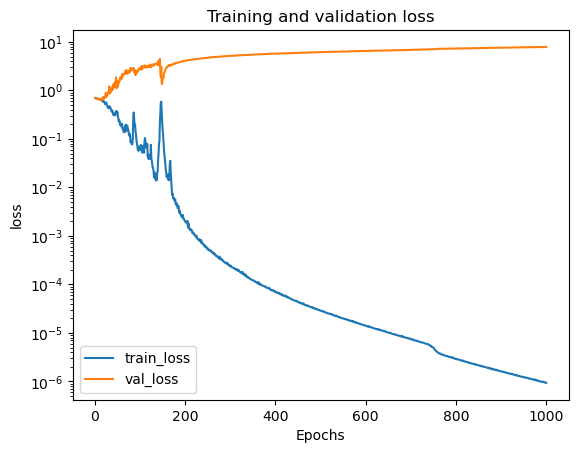

In [192]:
plot_metric(history_cb,'loss')

In [193]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [194]:
y_pred_train_cb = model_cb.predict(X_train) # This provides the probability for each class
y_pred_test_cb  = model_cb.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_cb = np.argmax(y_pred_train_cb, axis=1).reshape(-1,1)
y_pred_test_cb = np.argmax(y_pred_test_cb, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_cb, y_test, y_pred_test_cb)

7/7 [==============================] - 0s 1ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.83
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       103
         1.0       0.91      0.92      0.91        97

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

Results obtained for the TEST SET
The Cohen's Kappa is: -0.03
              precision    recall  f1-score   support

         0.0       0.47      0.45      0.46        98
         1.0       0.50      0.52      0.51       103

    accuracy                           0.49       201
   macro avg       0.49      0.49      0.49       201
weighted avg       0.49      0.49      0.49       201

